# Estudo de COMPRA de fundos imobiliários
#### O objetivo é criar uma carteira diversificada de FI's com objetivo de: 
###### i. risco mínimo
###### ii. valorização

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib as plt

In [2]:
import random as rdm
import statsmodels as mld

In [3]:
import decimal
from decimal import Decimal

In [4]:
decimal.getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [5]:
decimal.getcontext(). prec = 50

In [6]:
tickers = ['HSML11.SA', 'HGRU11.SA', 'BRCR11.SA','MGFF11.SA', 'RBRF11.SA', 'ALZR11.SA', 'HGLG11.SA', 'XPLG11.SA', 'VRTA11.SA', 'XPML11.SA', 'HGRE11.SA']
 
df_FI = pd.DataFrame()
    
for t in tickers:
    df_FI[t] = web.DataReader(t, data_source= 'yahoo', start = '2019-1-1') ['Adj Close']
    

In [7]:
# criando DataFrame de amostras

tickers = ['HSML11.SA', 'HGRU11.SA', 'BRCR11.SA','MGFF11.SA', 'RBRF11.SA', 'ALZR11.SA', 'HGLG11.SA', 'XPLG11.SA', 'VRTA11.SA', 'XPML11.SA', 'HGRE11.SA']
 
df_FI = pd.DataFrame()
    
for t in tickers:
    df_FI[t] = web.DataReader(t, data_source= 'yahoo', start = '2018-1-1') ['Adj Close']
   

In [8]:
# conferencia dos dados
df_FI.head(50)

,HSML11.SA,HGRU11.SA,BRCR11.SA,MGFF11.SA,RBRF11.SA,ALZR11.SA,HGLG11.SA,XPLG11.SA,VRTA11.SA,XPML11.SA,HGRE11.SA
Date,,,,,,,,,,,
2019-08-16,102.099998,112.900002,96.199997,98.500000,104.230003,106.300003,NaN,106.250000,123.389999,111.739998,163.800003
2019-08-19,103.099998,112.209999,96.169998,98.500000,104.300003,105.760002,NaN,106.000000,124.349998,111.639999,159.520004
2019-08-20,102.730003,113.059998,96.099998,98.900002,104.000000,105.500000,NaN,106.000000,124.199997,111.339996,156.490005
2019-08-21,103.000000,113.699997,95.500000,98.199997,104.000000,105.699997,NaN,105.760002,124.199997,111.110001,153.149994
2019-08-22,102.610001,113.000000,95.480003,98.400002,104.459999,105.599998,NaN,106.080002,124.290001,111.690002,152.050003
2019-08-23,103.580002,112.889999,94.599998,98.610001,104.699997,105.000000,NaN,106.000000,124.000000,110.849998,151.399994
2019-08-26,103.599998,112.500000,95.000000,99.000000,105.050003,104.489998,NaN,106.349998,122.010002,110.940002,150.000000
2019-08-27,103.750000,111.980003,93.410004,99.769997,104.900002,104.930000,NaN,106.949997,124.199997,110.750000,147.199997
2019-08-28,103.900002,112.500000,92.269997,100.000000,105.349998,104.599998,NaN,108.300003,131.979996,111.449997,150.009995


In [9]:
df_fi = df_FI.dropna()

In [10]:
df_fi.corr()

,HSML11.SA,HGRU11.SA,BRCR11.SA,MGFF11.SA,RBRF11.SA,ALZR11.SA,HGLG11.SA,XPLG11.SA,VRTA11.SA,XPML11.SA,HGRE11.SA
HSML11.SA,1.000000,0.903895,0.962293,0.656003,0.948358,0.948877,0.934604,0.928006,0.907277,0.887491,0.879700
HGRU11.SA,0.903895,1.000000,0.833415,0.591549,0.803455,0.855320,0.910770,0.926206,0.777226,0.847285,0.702081
BRCR11.SA,0.962293,0.833415,1.000000,0.718632,0.980599,0.973071,0.922094,0.879526,0.961893,0.901034,0.930978
MGFF11.SA,0.656003,0.591549,0.718632,1.000000,0.719706,0.764667,0.801134,0.781547,0.805823,0.801817,0.633879
RBRF11.SA,0.948358,0.803455,0.980599,0.719706,1.000000,0.966958,0.912004,0.873718,0.951527,0.903220,0.917175
ALZR11.SA,0.948877,0.855320,0.973071,0.764667,0.966958,1.000000,0.961147,0.928372,0.964519,0.942586,0.909467
HGLG11.SA,0.934604,0.910770,0.922094,0.801134,0.912004,0.961147,1.000000,0.979009,0.917834,0.934053,0.836011
XPLG11.SA,0.928006,0.926206,0.879526,0.781547,0.873718,0.928372,0.979009,1.000000,0.871445,0.926244,0.774536
VRTA11.SA,0.907277,0.777226,0.961893,0.805823,0.951527,0.964519,0.917834,0.871445,1.000000,0.919446,0.924836
XPML11.SA,0.887491,0.847285,0.901034,0.801817,0.903220,0.942586,0.934053,0.926244,0.919446,1.000000,0.856408


In [11]:
df_FI.describe()

,HSML11.SA,HGRU11.SA,BRCR11.SA,MGFF11.SA,RBRF11.SA,ALZR11.SA,HGLG11.SA,XPLG11.SA,VRTA11.SA,XPML11.SA,HGRE11.SA
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,83.000000,106.000000,106.000000,106.000000,106.000000
mean,108.387642,121.694245,98.708396,110.544151,111.464529,115.565566,175.841205,118.580660,128.603962,122.404623,171.011037
std,8.133581,10.147443,9.711887,8.984916,9.658252,12.376990,18.467508,15.122091,6.661009,10.855657,16.922998
min,101.500000,111.980003,90.000000,98.199997,103.800003,104.489998,153.449997,101.750000,120.419998,110.610001,147.199997
25%,102.800003,113.500000,92.025000,103.025000,104.965000,105.919998,159.725006,106.000000,123.650002,112.375002,159.192501
50%,103.940002,114.700001,93.705002,107.005001,107.724998,110.889999,172.199997,109.285000,127.235001,119.494999,167.275002
75%,113.225002,133.615005,102.182499,117.937500,113.662498,121.627499,193.089996,130.637505,129.965004,129.842499,176.837502
max,125.959999,140.000000,124.000000,132.990005,138.699997,148.990005,221.139999,149.979996,146.300003,147.000000,213.360001


In [12]:
# dados iniciados em meados de setembro
log_return = np.log(df_fi/df_fi.shift(1))
log_return.plot(figsize=(15,7))

In [13]:
log_return.mean()*75

HSML11.SA    0.153529
HGRU11.SA    0.161968
BRCR11.SA    0.230904
MGFF11.SA    0.147349
RBRF11.SA    0.216764
ALZR11.SA    0.210464
HGLG11.SA    0.205056
XPLG11.SA    0.268926
VRTA11.SA    0.111396
XPML11.SA    0.198590
HGRE11.SA    0.225821
dtype: float64

In [14]:
log_return.std()

HSML11.SA    0.008428
HGRU11.SA    0.016570
BRCR11.SA    0.010932
MGFF11.SA    0.018865
RBRF11.SA    0.013177
ALZR11.SA    0.014746
HGLG11.SA    0.012587
XPLG11.SA    0.011378
VRTA11.SA    0.009862
XPML11.SA    0.011908
HGRE11.SA    0.014928
dtype: float64

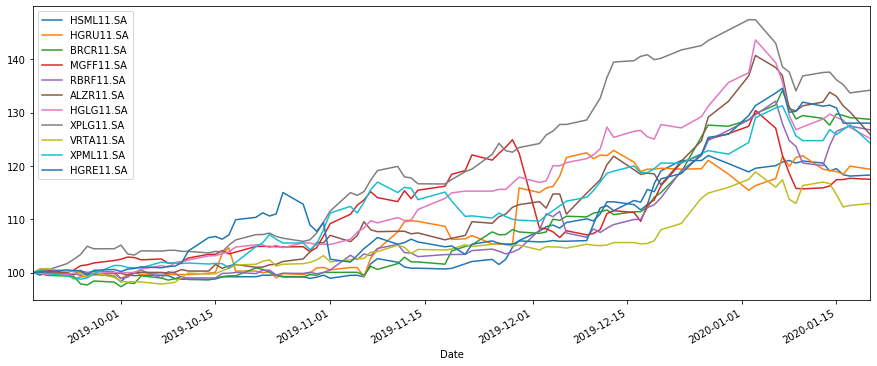

In [15]:
# normalizando retornos
( df_fi/ df_fi.iloc[0] * 100).plot(figsize= (15,6))

# Trocar ativos aqui

In [16]:
# selecionados 'HSML11.SA', 'MGFF11.SA', 'HGRU11.SA' (menor risco)
# selecionados 'XPLG11.SA', 'MGFF11.SA', 'BRCR11.SA' (maior retorno)

df_carteira = pd.DataFrame()

df_carteira = df_fi.loc[:,['XPLG11.SA','MGFF11.SA', 'BRCR11.SA']]  

In [17]:
log_carteira = np.log(df_carteira/df_carteira.shift(1))


In [18]:
# selecionados 'HSML11.SA', 'MGFF11.SA', 'HGRU11.SA'
# selecionados 'XPLG11.SA', 'MGFF11.SA', 'BRCR11.SA'
a1_var = log_carteira['XPLG11.SA'].var()
a2_var = log_carteira['MGFF11.SA'].var()
a3_var = log_carteira['BRCR11.SA'].var()

In [19]:
# por período
a1_var_p= log_carteira['XPLG11.SA'].var()*75
a2_var_p= log_carteira['MGFF11.SA'].var()*75
a3_var_p= log_carteira['BRCR11.SA'].var()*75

In [20]:
cov_matrix = log_carteira.cov()

In [21]:
cov_matrix_p = log_carteira.cov()*75

In [22]:
corr_matrix = log_carteira.corr()

# Peso dos ativos

In [23]:
# peso do investimento 

peso = np.array([0.3,0.4,0.3])

In [24]:
carteira_var = np.dot(peso.T, np.dot(cov_matrix_p,peso))
carteira_var**0.5

0.08848027772756756

In [25]:
print( 'O risco da carteira é '+ str(round(carteira_var**0.5,5)*100)+ ' %')

O risco da carteira é 8.848 %


In [26]:
df_carteira.iloc[0]

XPLG11.SA    101.750000
MGFF11.SA    102.000000
BRCR11.SA     92.449997
Name: 2019-09-18 00:00:00, dtype: float64

### Normalizando retornos

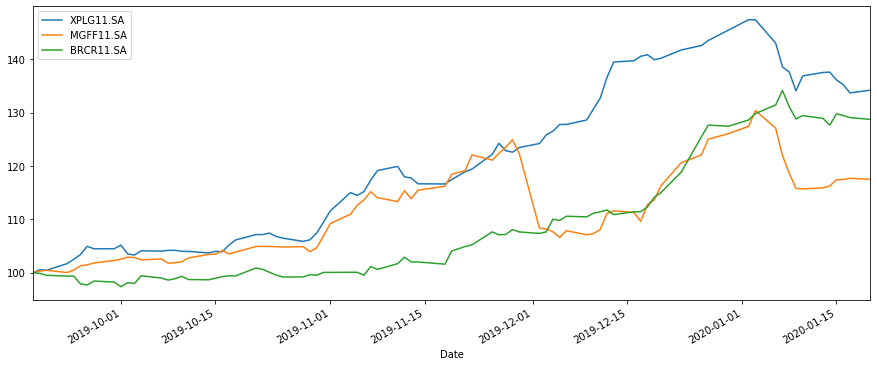

In [27]:
( df_carteira/ df_carteira.iloc[0] * 100).plot(figsize= (15,6))

In [28]:
np.dot(log_carteira.mean() * 75 ,peso)

0.20888857426153662

In [29]:
print(('A carteira possui retorno esperado de ' + str(round(np.dot(log_carteira.mean() * 75 ,peso),5)*100)+' %') + ( ' e risco de '+ str(round(carteira_var**0.5,5)*100)+ ' %'))

A carteira possui retorno esperado de 20.889 % e risco de 8.848 %
